data understanding

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv("Employee_data.csv")

# Display the first few rows
print(df.head())

# Get basic statistical summary for all columns
print(df.describe(include='all'))


   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Siz

In [ ]:
handel the missing value

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv("Employee_data.csv")

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values using median for numerical columns
df['Distance from Home'].fillna(df['Distance from Home'].median(), inplace=True)
df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].median(), inplace=True)

# Check again to ensure missing values are handled
print("Missing values after handling:")
print(df.isnull().sum())


Missing values before handling:
Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64
Missing values after handling:
Employee ID                   0
Age                           0
Gender              

<ipython-input-2-cce60f1b9042>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance from Home'].fillna(df['Distance from Home'].median(), inplace=True)
<ipython-input-2-cce60f1b9042>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

 Identify and handle redundant values within categorical columns

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv("Employee_data.csv")

# Get categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Check unique values in each categorical column
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

# Optional: Normalize case and remove leading/trailing whitespace
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# You can also manually map values if needed (example)
# df['Attrition'] = df['Attrition'].replace({'stayed': 'Stayed', 'left': 'Left'})


Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Job Role':
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Unique values in 'Work-Life Balance':
['Excellent' 'Poor' 'Good' 'Fair']

Unique values in 'Job Satisfaction':
['Medium' 'High' 'Very High' 'Low']

Unique values in 'Performance Rating':
['Average' 'Low' 'High' 'Below Average']

Unique values in 'Overtime':
['No' 'Yes']

Unique values in 'Education Level':
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Unique values in 'Marital Status':
['Married' 'Divorced' 'Single']

Unique values in 'Job Level':
['Mid' 'Senior' 'Entry']

Unique values in 'Company Size':
['Medium' 'Small' 'Large']

Unique values in 'Remote Work':
['No' 'Yes']

Unique values in 'Leadership Opportunities':
['No' 'Yes']

Unique values in 'Innovation Opportunities':
['No' 'Yes']

Unique values in 'Company Reputation':
['Excellent' 'Fair' 'Poor' 'Good']

Unique values in 'Employee Recognition':
['Medium

 Drop redundant columns

In [5]:
import pandas as pd

# Load the data
df = pd.read_csv("Employee_data.csv")

# 1. Drop ID column if not needed for modeling
df.drop(columns=['Employee ID'], inplace=True)

# 2. Drop columns with only one unique value
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Dropping column with a single value: {col}")
        df.drop(columns=[col], inplace=True)


Split the data into train and validation with a 70:30 ratio

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("Employee_data.csv")

# Optional: If your target variable is 'Attrition', separate it
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Perform the 70:30 split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify to maintain class balance
)

# Combine back if needed
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)

# Check the split
print("Training set size:", train_data.shape)
print("Validation set size:", val_data.shape)


Training set size: (52227, 24)
Validation set size: (22383, 24)


Perform univariate analysis

<Figure size 1500x1000 with 0 Axes>

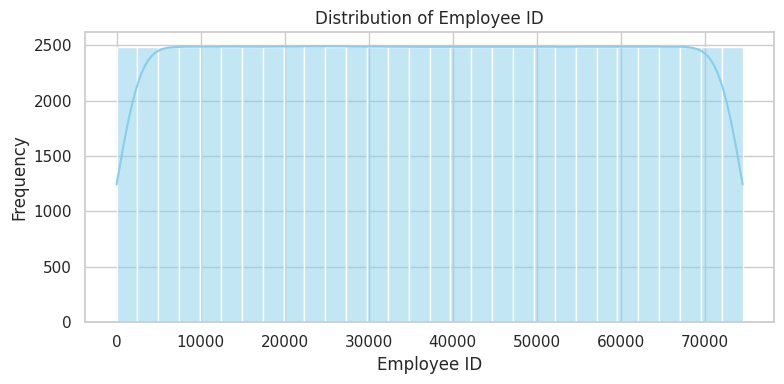

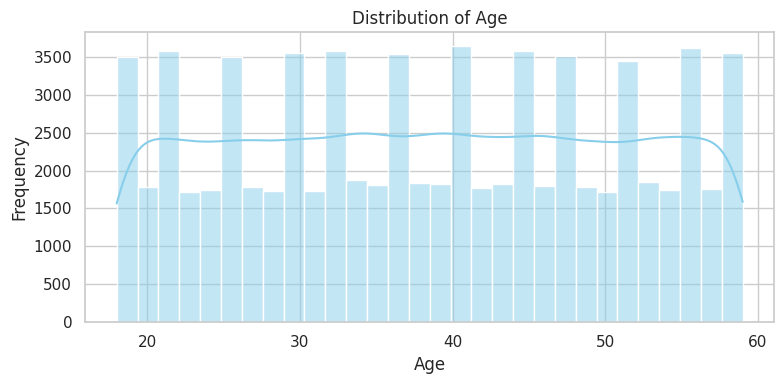

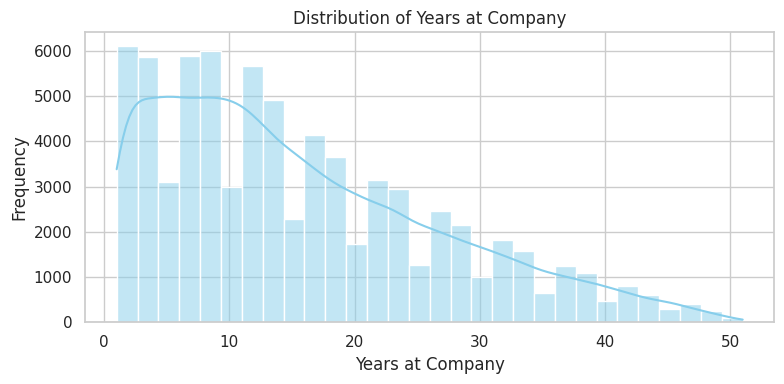

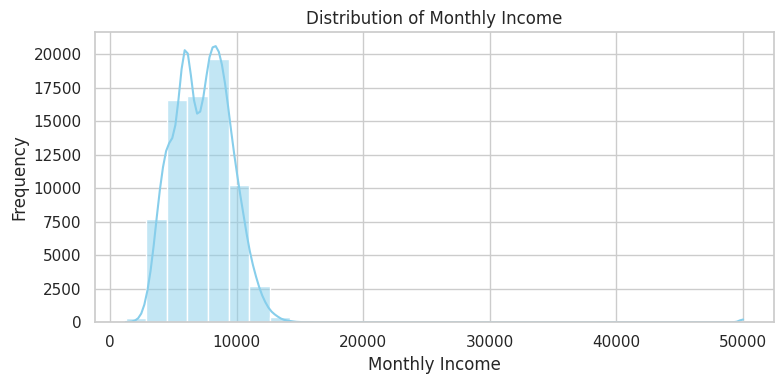

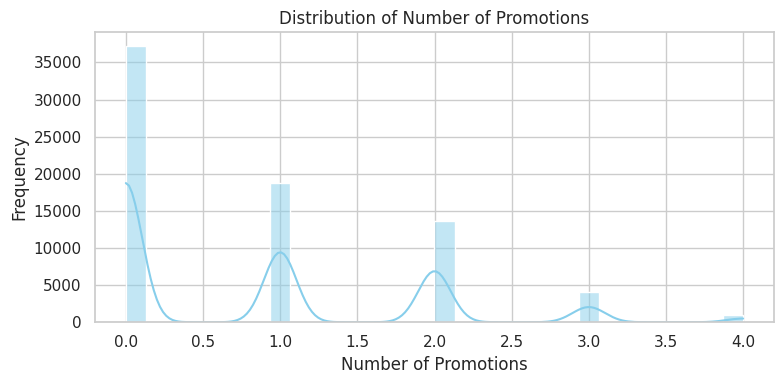

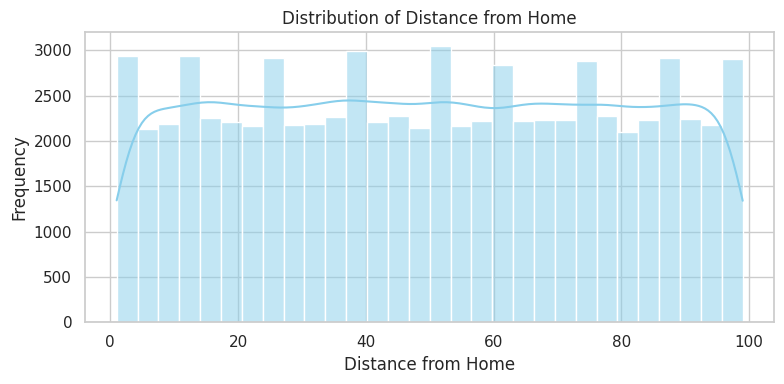

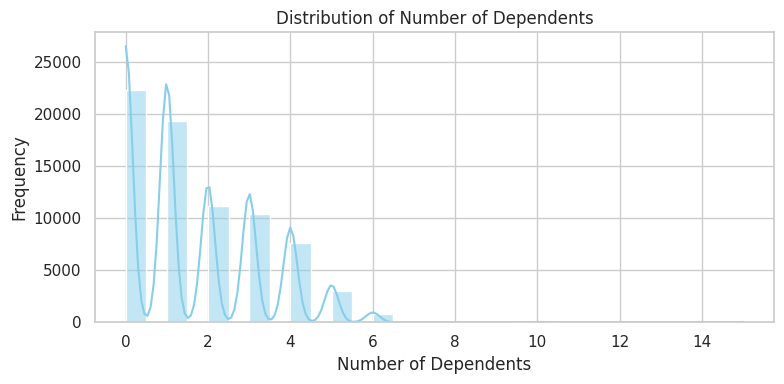

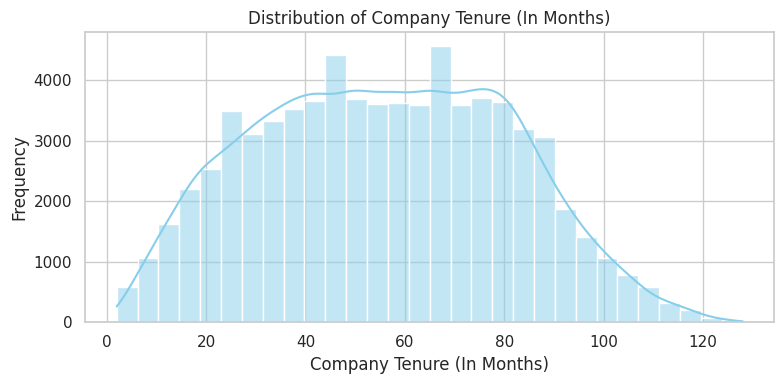

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


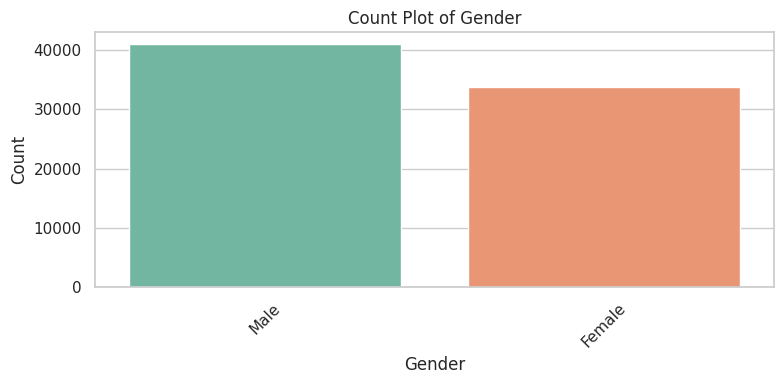

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


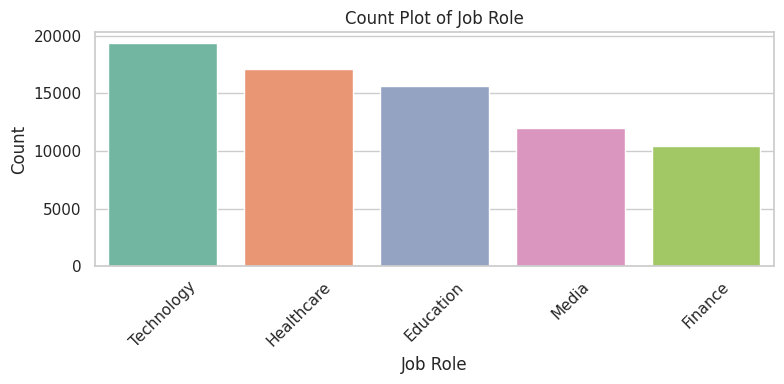

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


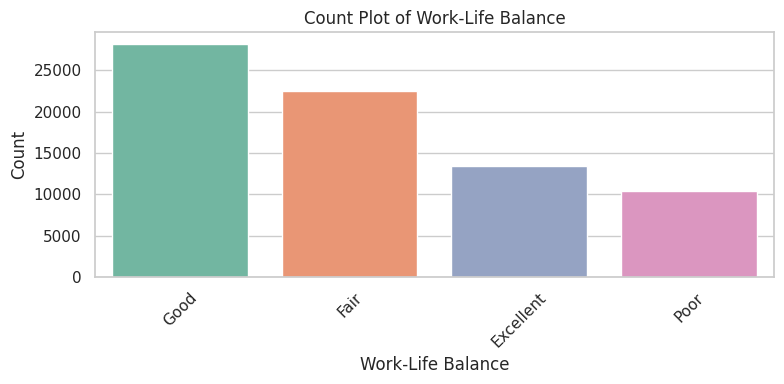

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


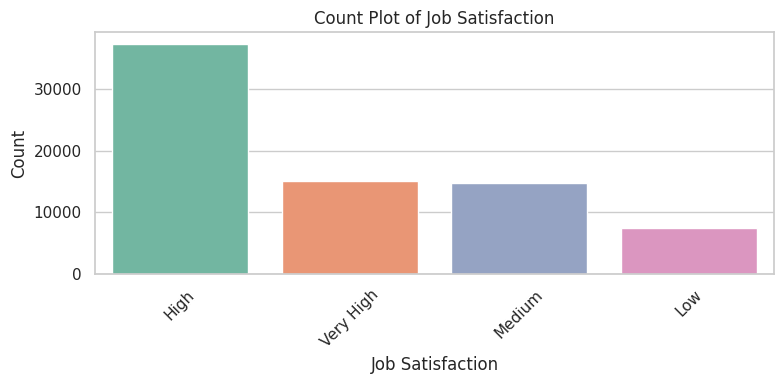

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


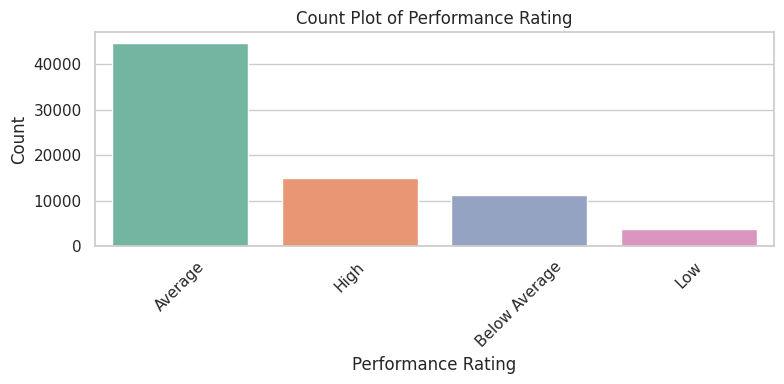

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


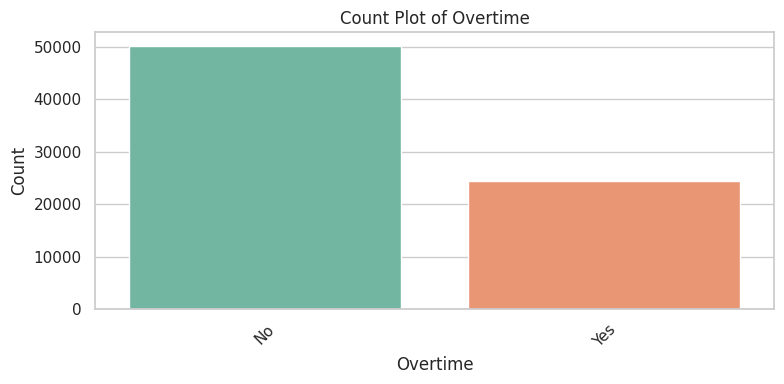

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


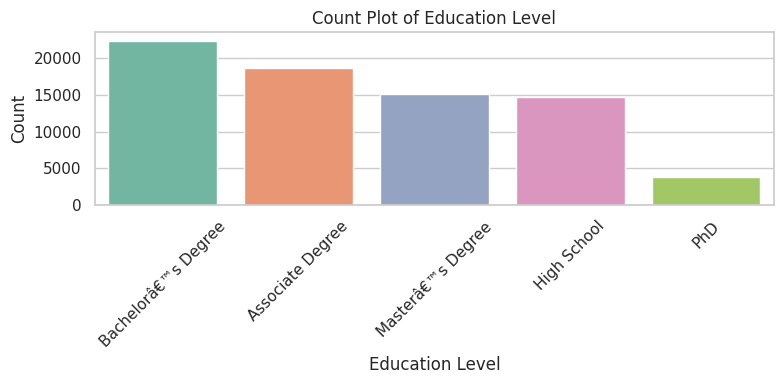

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


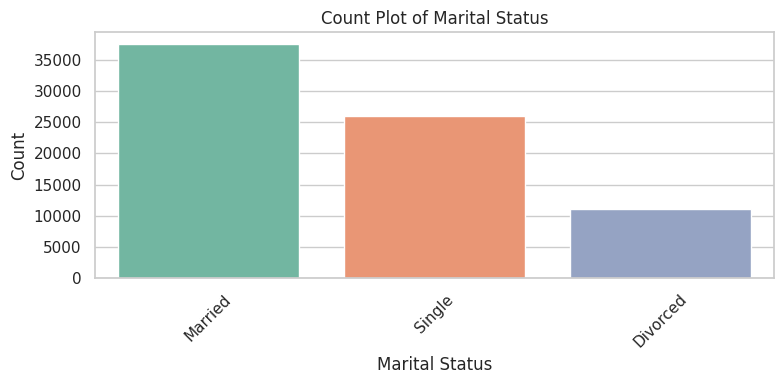

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


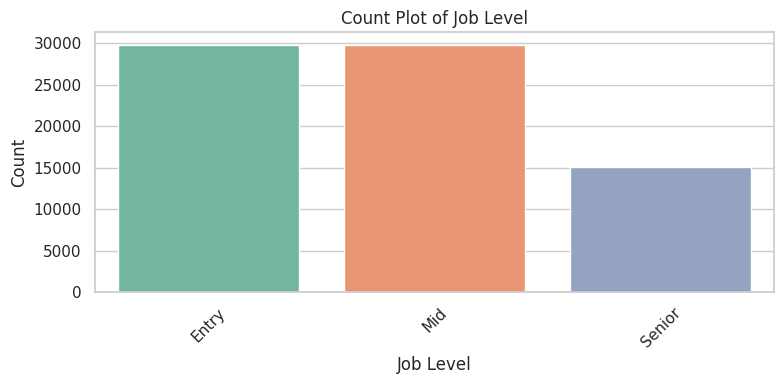

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


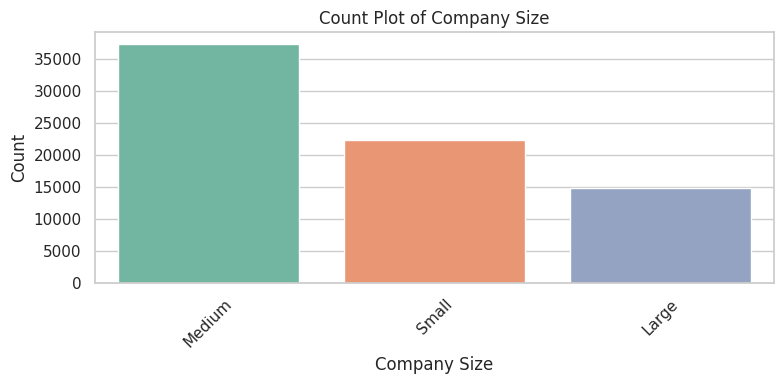

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


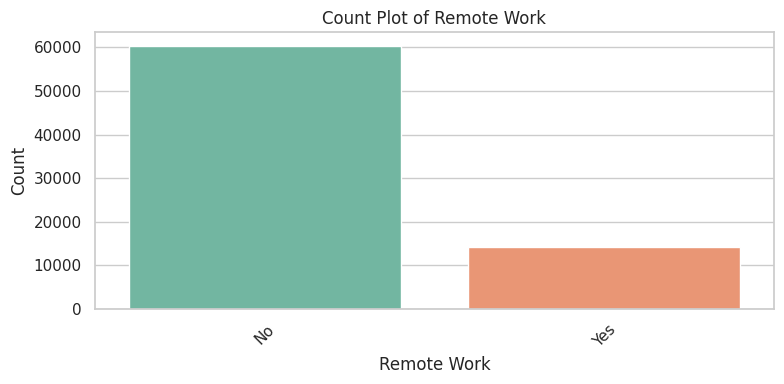

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


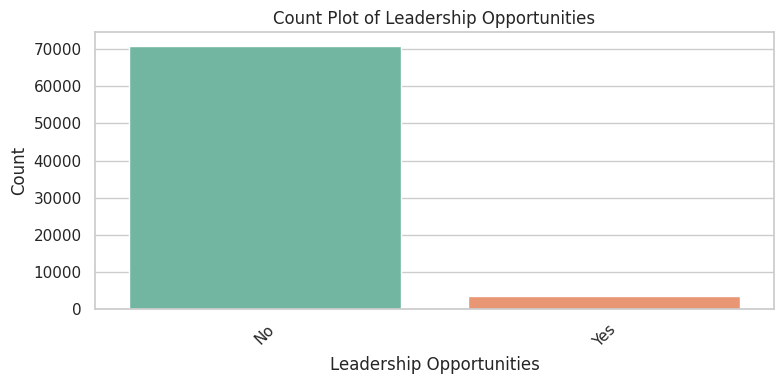

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


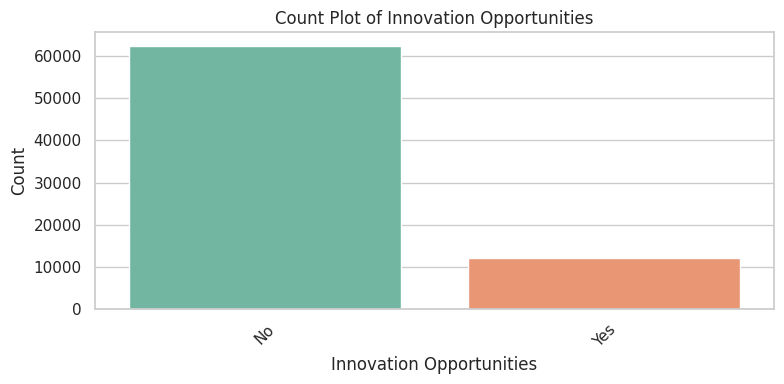

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


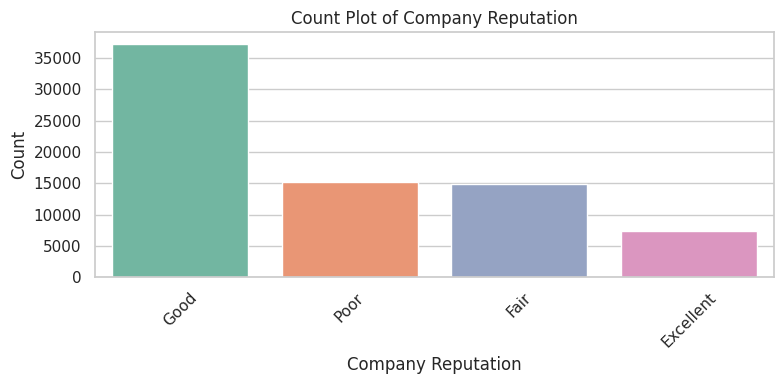

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


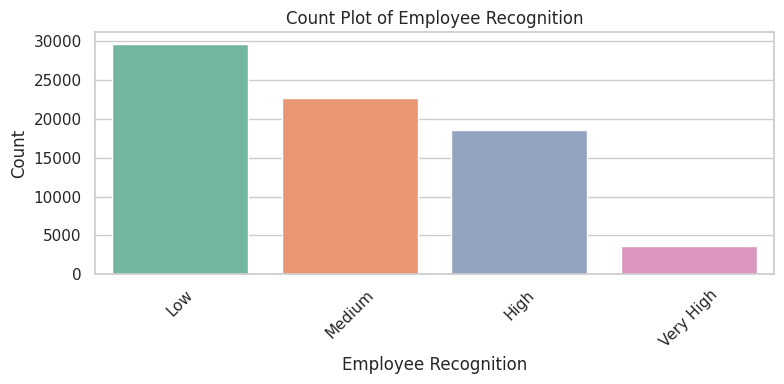

<ipython-input-7-27059d8cb4aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


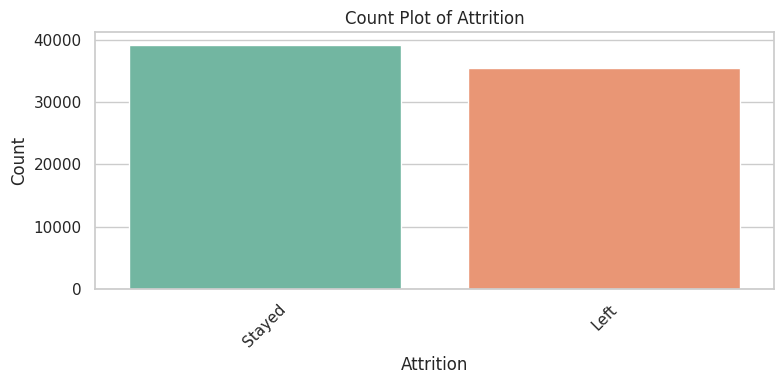

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
df = pd.read_csv("Employee_data.csv")  # You can load train_data if you've already split

# Set up plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Separate numeric and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# 1. Univariate analysis for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 2. Univariate analysis for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 Perform correlation analysis

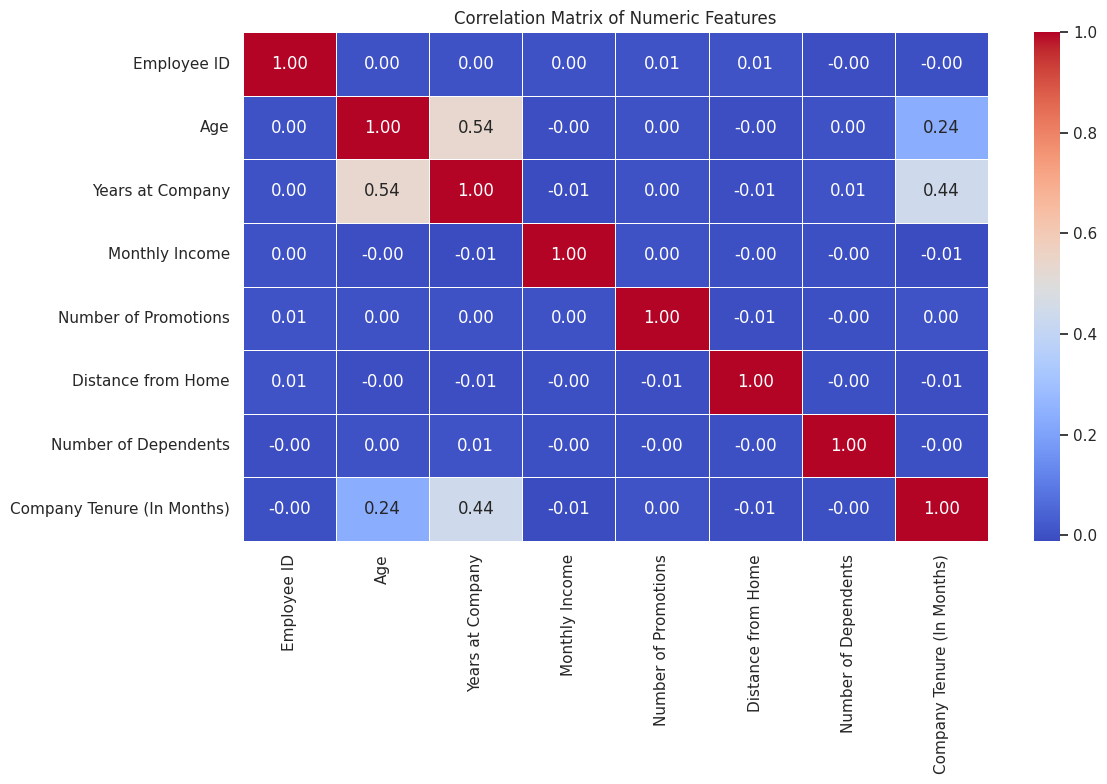

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Employee_data.csv")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


Check the class balance

In [13]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/Employee_data.csv'
data = pd.read_csv("/content/Employee_data.csv")

# Check class balance for the 'Attrition' column
print("Class Balance:")
print(data['Attrition'].value_counts())

# Check class balance as percentages
print("\nClass Balance (Percentage):")
print(data['Attrition'].value_counts(normalize=True) * 100)

Class Balance:
Attrition
Stayed    39191
Left      35419
Name: count, dtype: int64

Class Balance (Percentage):
Attrition
Stayed    52.527811
Left      47.472189
Name: proportion, dtype: float64


Perform bivariate analysis

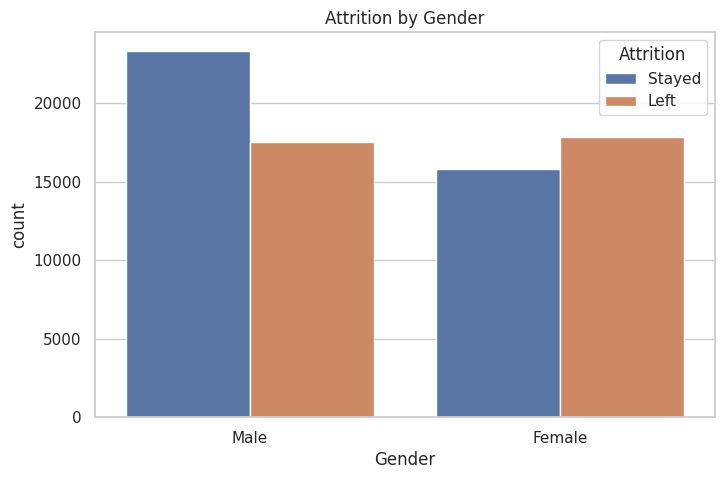

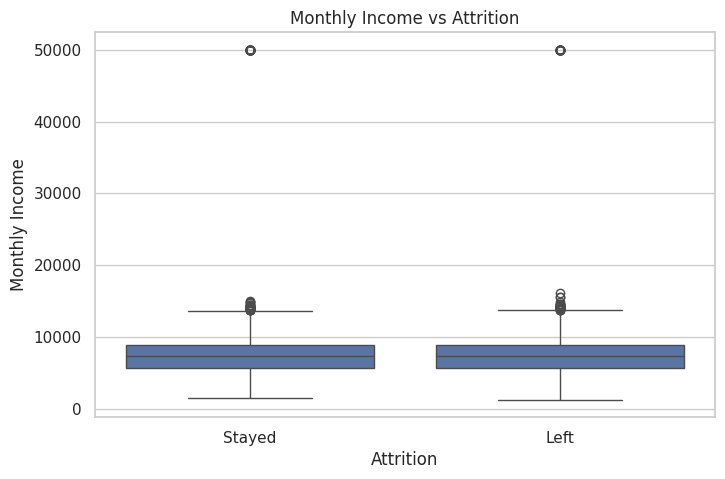

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/mnt/data/Employee_data.csv'
data = pd.read_csv("/content/Employee_data.csv")

# Set the visual style
sns.set(style="whitegrid")

# Example 1: Categorical Variable vs Attrition
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.show()

# Example 2: Numerical Variable vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Attrition', y='Monthly Income')
plt.title('Monthly Income vs Attrition')
plt.show()


EDA on Validation Data

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status 

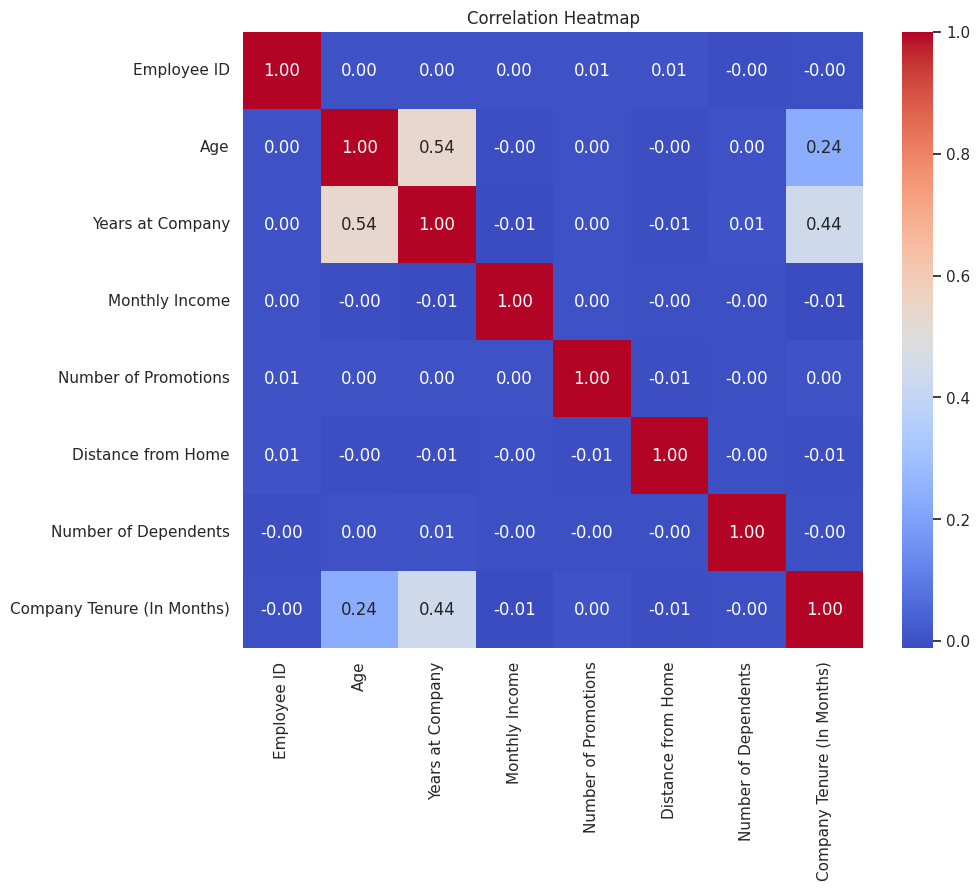

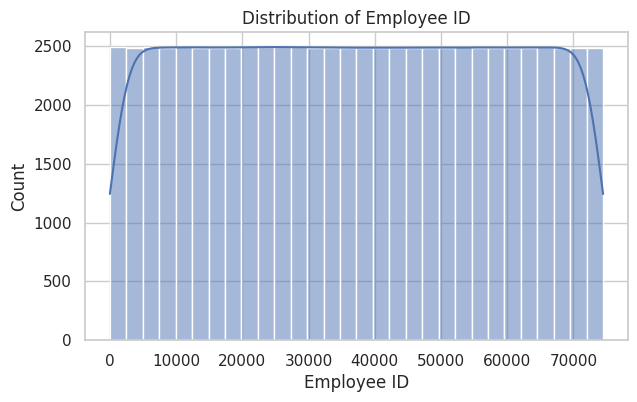

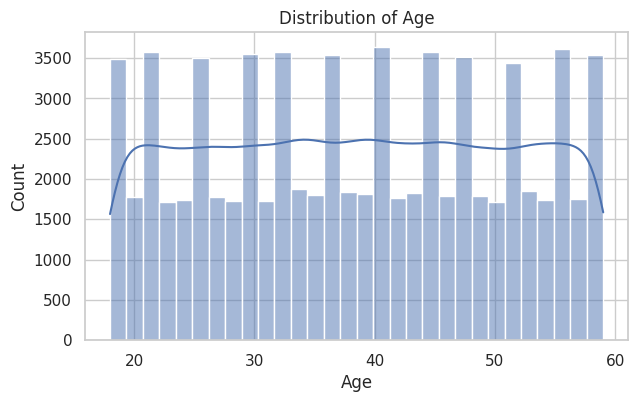

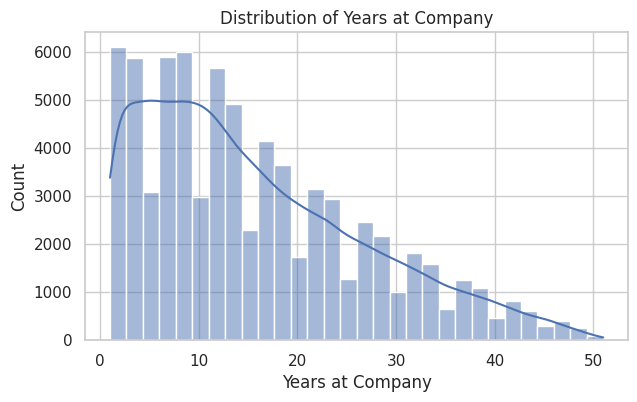

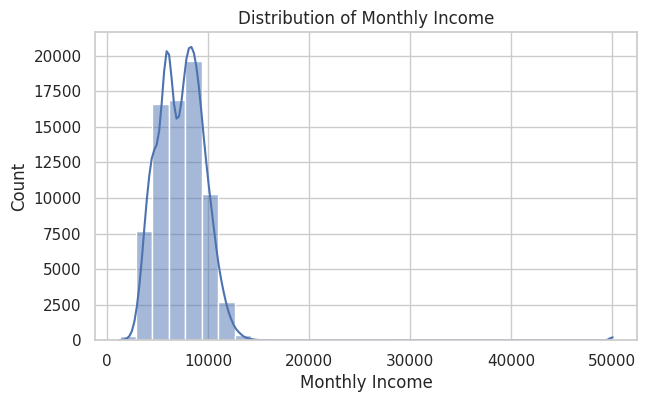

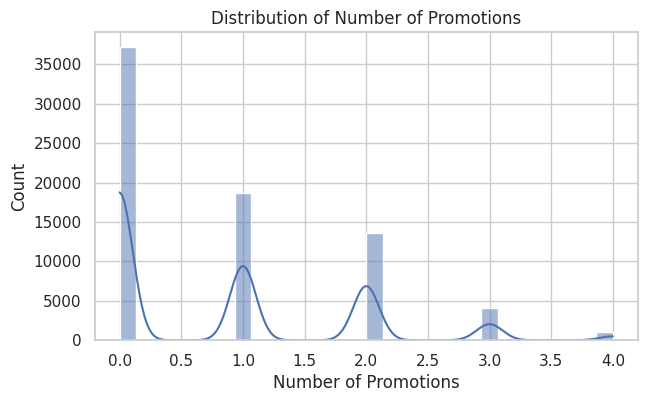

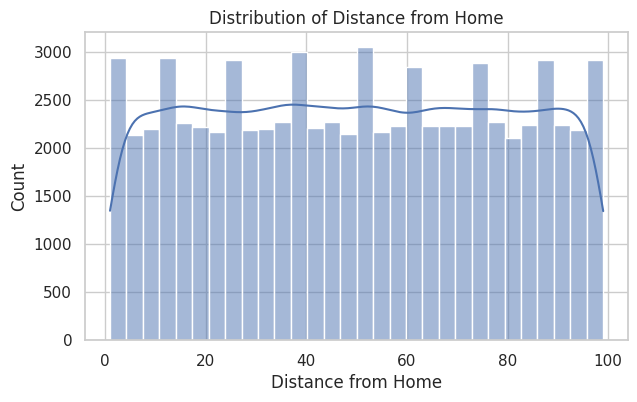

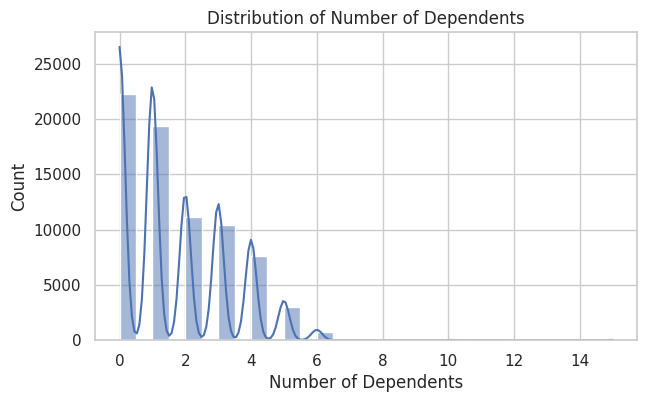

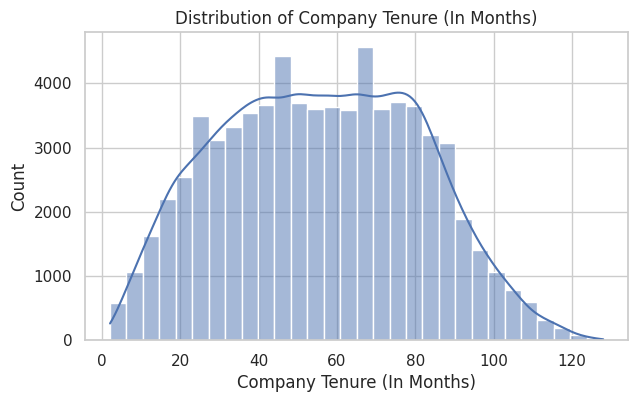

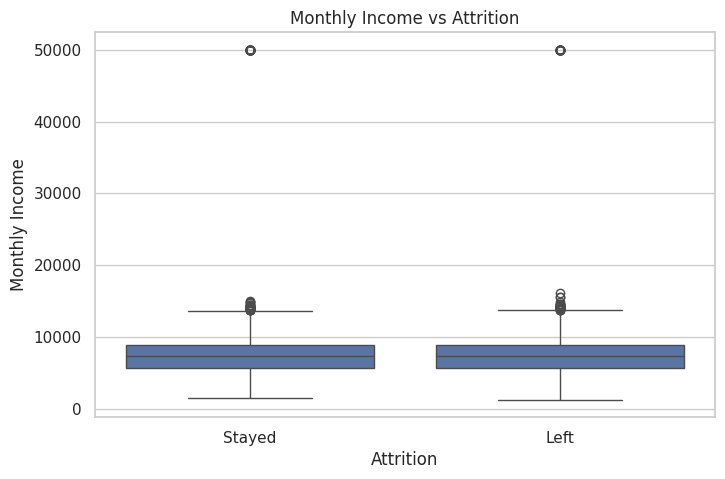

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the validation dataset
validation_data = pd.read_csv("/content/Employee_data.csv")  # Update path if different

# Basic Info
print("📋 Dataset Info:")
print(validation_data.info())

# Statistical Summary
print("\n📊 Statistical Summary:")
print(validation_data.describe(include='all'))

# Checking Missing Values
print("\n🧹 Missing Values:")
print(validation_data.isnull().sum())
# Class Balance (assuming target is 'Attrition')
print("\n⚖ Class Balance:")
print(validation_data['Attrition'].value_counts())
print("\nClass Balance (%):")
print(validation_data['Attrition'].value_counts(normalize=True) * 100)

# Correlation Heatmap for Numeric Columns
plt.figure(figsize=(10,8))
sns.heatmap(validation_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Key Numeric Features
numeric_cols = validation_data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(validation_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.show()

# Relationship between Numerical Feature and Target
plt.figure(figsize=(8,5))
sns.boxplot(data=validation_data, x='Attrition', y='Monthly Income')  # Example: Replace as needed
plt.title('Monthly Income vs Attrition')
plt.show()


 Dummy variable creation

In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Employee_data.csv")

# Check which columns are categorical
print("Categorical Columns:")
print(data.select_dtypes(include=['object']).columns)

# Create dummy variables for categorical columns
# (drop_first=True avoids multicollinearity by removing the first dummy column)
data_dummies = pd.get_dummies(data, drop_first=True)

# Preview the new dataframe
print("\nTransformed Data with Dummies:")
print(data_dummies.head())

# Save the transformed data to a new CSV if needed
# data_dummies.to_csv('/mnt/data/Employee_data_with_dummies.csv', index=False)

Categorical Columns:
Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

Transformed Data with Dummies:
   Employee ID  Age  Years at Company  Monthly Income  Number of Promotions  \
0         8410   31                19            5390                     2   
1        64756   59                 4            5534                     3   
2        30257   24                10            8159                     0   
3        65791   36                 7            3989                     1   
4        65026   56                41            4821                     0   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0                22.0                     0   

Feature scaling

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
data = pd.read_csv("/content/Employee_data.csv")

# Select only numerical columns for scaling
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns for Scaling:")
print(numeric_cols)

# Example: Using StandardScaler
standard_scaler = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[numeric_cols] = standard_scaler.fit_transform(data[numeric_cols])

print("\nStandard Scaled Data (first 5 rows):")
print(data_standard_scaled.head())


Numeric Columns for Scaling:
Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

Standard Scaled Data (first 5 rows):
   Employee ID       Age  Gender  Years at Company    Job Role  \
0    -1.340859 -0.623179    Male          0.291996   Education   
1     1.279198  1.694277  Female         -1.044428       Media   
2    -0.324986 -1.202542  Female         -0.509858  Healthcare   
3     1.327325 -0.209347  Female         -0.777143   Education   
4     1.291753  1.445978    Male          2.252085   Education   

   Monthly Income Work-Life Balance Job Satisfaction Performance Rating  \
0       -0.752952         Excellent           Medium            Average   
1       -0.697490              Poor             High                Low   
2        0.313543              Good             High                Low   
3       -1.292554              G

Feature selection

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataset
data = pd.read_csv("/content/Employee_data.csv")

# Drop non-feature columns (like IDs) and separate target
X = data.drop('Attrition', axis=1)   # Replace 'Attrition' with your actual target column
y = data['Attrition']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Ensure target is numeric for model
y = y.map({'Stayed': 0, 'Left': 1})  # Adjust this based on your dataset

# === Method 1: Correlation filter (numeric columns) ===

print("\nTop Correlated Features:")


# === Method 2: SelectKBest using Chi-Squared ===
selector = SelectKBest(score_func=chi2, k=10)  # select top 10 features
print("\nSelected Features using Chi-Squared:")


# === Method 3: Feature Importance using Random Forest ===
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance sorted
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance (Random Forest):")
print(importance.head(10))


Top Correlated Features:

Selected Features using Chi-Squared:

Feature Importance (Random Forest):
Distance from Home            0.077305
Job Level_Senior              0.071400
Employee ID                   0.069506
Company Tenure (In Months)    0.069470
Monthly Income                0.069260
Age                           0.060995
Years at Company              0.060919
Marital Status_Single         0.057354
Remote Work_Yes               0.046486
Number of Dependents          0.037844
dtype: float64


Building a logistic regression model

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("/content/Employee_data.csv")

# Quick look at the data
print(df.head())
print(df.info())

# Preprocessing
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Handle missing values (optional: depending on your dataset)
df = df.dropna()
# Define features and target
# Let's assume the target is a column named 'Attrition' (common in employee datasets)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Siz

 Find the optimal cutoff

Optimal cutoff: 0.5600251356195377


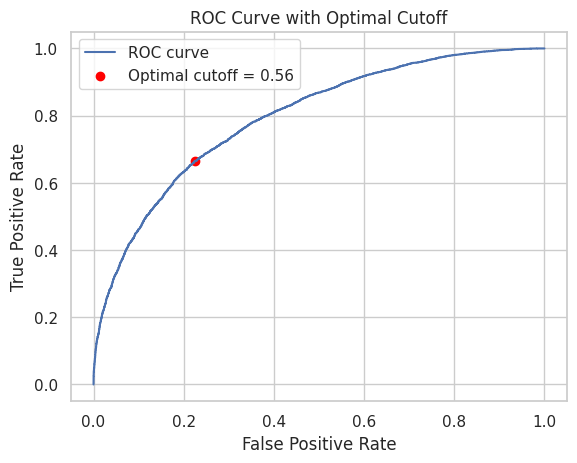

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the data
df = pd.read_csv("/content/Employee_data.csv")
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df = df.dropna()
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit model and predict probabilities
model = LogisticRegression()
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1]

# Find optimal cutoff
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print("Optimal cutoff:", optimal_threshold)

# Optional: Plot ROC and cutoff
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal cutoff = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Cutoff')
plt.legend()
plt.show()

Make predictions over the validation set

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities for the validation set
y_probs = model.predict_proba(X_test)[:, 1]

# Apply the optimal cutoff
y_pred_custom = (y_probs >= optimal_threshold).astype(int)

# Evaluate predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

Confusion Matrix:
[[5243 1516]
 [2472 4896]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.72      6759
           1       0.76      0.66      0.71      7368

    accuracy                           0.72     14127
   macro avg       0.72      0.72      0.72     14127
weighted avg       0.72      0.72      0.72     14127



 Calculate the accuracy of the model

In [43]:
from sklearn.metrics import accuracy_score

# Predict using the optimal threshold
y_pred_custom = (y_probs >= optimal_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Model Accuracy (using optimal cutoff): {accuracy:.4f}")

Model Accuracy (using optimal cutoff): 0.7177


 Create a confusion matrix and create variables for true positive, true negative, false positive and false   negative

In [44]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)

# Extract values
TN, FP, FN, TP = cm.ravel()

# Print results
print("Confusion Matrix:")
print(cm)
print(f"\nTrue Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

Confusion Matrix:
[[5243 1516]
 [2472 4896]]

True Negatives (TN): 5243
False Positives (FP): 1516
False Negatives (FN): 2472
True Positives (TP): 4896



 Calculate sensitivity and specificity

In [45]:
from sklearn.metrics import confusion_matrix

# Assuming you've already predicted using the optimal threshold:
y_pred_custom = (y_probs >= optimal_threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)
TN, FP, FN, TP = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print results
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Sensitivity (Recall): 0.6645
Specificity: 0.7757


Calculate precision and recall

In [46]:
from sklearn.metrics import precision_score, recall_score

# Predict using the optimal threshold
y_pred_custom = (y_probs >= optimal_threshold).astype(int)

# Calculate precision and recall
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")

Precision: 0.7636
Recall (Sensitivity): 0.6645
